In [1]:
import sys, os
sys.path.insert(0, '/home/niell_lab/Documents/github/FreelyMovingEphys-dmm/')
from projects.ephys.population import Population
import pandas as pd
from src.utils.path import find
from src.utils.auxiliary import flatten_series
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib import cm
import matplotlib.gridspec as gridspec
import xarray as xr
from matplotlib.patches import Ellipse

In [2]:
mpl.rcParams.update({'font.size': 25})
mpl.rcParams['axes.spines.top'] = False
mpl.rcParams['axes.spines.right'] = False

In [3]:
%matplotlib inline

# Load hffm data

In [4]:
hffm_savepath = '/home/niell_lab/data/freely_moving_ephys/batch_files/021022/hffm'
hffm = Population(savepath=hffm_savepath)
hffm.load(fname='hffm_gratfix')

reading from /home/niell_lab/data/freely_moving_ephys/batch_files/021022/hffm/hffm_gratfix.pickle


# Gaussian mixture clustering

In [14]:
from sklearn.mixture import GaussianMixture

In [6]:
gm_input = flatten_series(hffm.data['pref_gazeshift_psth'])

In [7]:
np.shape(gm_input)

(716, 83)

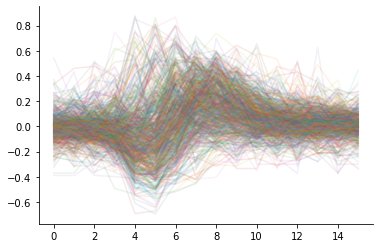

In [13]:
win = [37, 53]
gm_input1 = gm_input[:,win[0]:win[1]]
for i in range(np.size(gm_input1, 0)):
    plt.plot(gm_input1[i,:], alpha=0.1)

In [15]:
gm = GaussianMixture(n_components=5)
gm.fit(gm_input1)

GaussianMixture(n_components=5)

In [16]:
labels = gm.predict(gm_input1)

In [20]:
hffm.data['mov_gmclust'] = labels

In [ ]:
np.
for l in range(5):
    lunits = flatten_series(hffm.data['pref_gazeshift_psth'][hffm.data['mov_kmclust']==l])

In [ ]:
plt.subplots(2,3, figsize=(15,10))
mean_cluster = dict()
for label in range(5):
    plt.subplot(2,3,label+1)
    plt.title('cluster='+str(label)+' count='+str(len(self.data['pref_gazeshift_psth'][self.data['mov_kmclust']==label].dropna())))
    inhibitory = flatten_series(self.data['pref_gazeshift_psth'][self.data['mov_kmclust']==label][self.data['exc_or_inh']=='inh'])
    for i in range(len(inhibitory)):
        plt.plot(self.trange_x, inhibitory[i], 'g', alpha=0.1, linewidth=1)
    excitatory = flatten_series(self.data['pref_gazeshift_psth'][self.data['mov_kmclust']==label][self.data['exc_or_inh']=='exc'])
    for i in range(len(excitatory)):
        plt.plot(self.trange_x, excitatory[i], 'b', alpha=0.1, linewidth=1)
    all_units = flatten_series(self.data['pref_gazeshift_psth'][self.data['mov_kmclust']==label])
    plt.plot(self.trange_x, np.nanmean(all_units, axis=0), 'k', linewidth=3)
    plt.xlim([-0.5,0.75]); plt.ylabel('norm spike rate'); plt.xlabel('sec')
    mean_cluster[label] = np.nanmean(all_units, axis=0)
plt.legend(handles=[self.bluepatch, self.greenpatch])
plt.tight_layout(); self.poppdf.savefig(); plt.close()

cluster_to_cell_type = dict()
for cluster_num, orig_cluster in mean_cluster.items():
    cluster = flatten_series(self.data['pref_gazeshift_psth'][self.data['mov_kmclust']==cluster_num])
    cluster_mean = np.nanmean(cluster, 0)
    baseline = np.nanmean(cluster_mean[:30])
    p, t = self.get_peak_trough(cluster_mean[38:50], baseline)
    cluster_to_cell_type[cluster_num] = self.get_cluster_props(p, t)
for ind, row in self.data.iterrows():
    self.data.at[ind, 'movcluster'] = cluster_to_cell_type[row['mov_kmclust']]

# How well did it work? How does it compare to existing labels?

# How well does it work when applied to ltdk data?

In [30]:
ltdk_savepath = '/home/niell_lab/data/freely_moving_ephys/batch_files/021022/ltdk'
ltdk = Population(savepath=ltdk_savepath)
ltdk.load(fname='ltdk_pop')

reading from /home/niell_lab/data/freely_moving_ephys/batch_files/021022/ltdk/ltdk_pop.pickle
